Import karo ye libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


#load datatset


In [2]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,16402,10888,597,180,1.0,2,1
1,0,0,1,0,22371,12540,666,240,1.0,1,1
2,1,1,0,1,17038,2097,435,360,1.0,0,1
3,1,0,0,0,5572,7318,174,360,0.0,2,0
4,0,0,1,0,17068,4663,689,120,1.0,1,1


2️⃣ Feature Engineering

Ab kuch new columns banate hain jisse model better predict kare:

In [3]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Debt_to_Income_Ratio'] = df['EMI'] / df['Total_Income']


In [4]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Debt_to_Income_Ratio
0,1,1,0,0,16402,10888,597,180,1.0,2,1,27290,3.316667,0.000122
1,0,0,1,0,22371,12540,666,240,1.0,1,1,34911,2.775000,0.000079
2,1,1,0,1,17038,2097,435,360,1.0,0,1,19135,1.208333,0.000063
3,1,0,0,0,5572,7318,174,360,0.0,2,0,12890,0.483333,0.000037
4,0,0,1,0,17068,4663,689,120,1.0,1,1,21731,5.741667,0.000264


In [5]:
df.shape

(158, 14)

In [6]:
#⚠️ Agar koi infinite ya NaN aata hai, to usse 0 se fill kar do:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


3️⃣ Feature aur Target Split

Target = Loan_Status
Features = baaki sab columns

In [7]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


4️⃣ Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


5️⃣ Random Forest Model Training

In [9]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

6️⃣ Model Evaluation

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        20

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



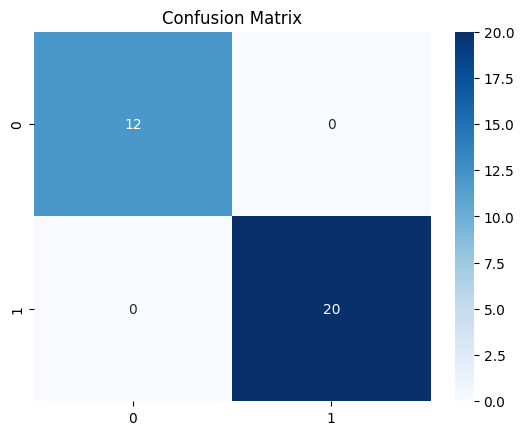

In [10]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


7️⃣ Feature Importance

Dekho model ke liye kaunse features sabse important hain:

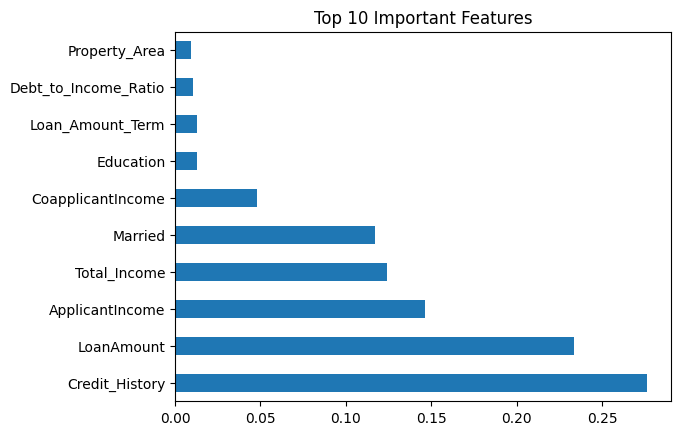

In [11]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


8️⃣ Model Save Karna

Trained model ko save karo taaki Flask me use kar sakein:

In [ ]:
import joblib
joblib.dump(rf_model, '../models/random_forest_model.pkl')


In [13]:
joblib.dump(rf_model, '../models/random_forest_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!
